In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a professional style for the visualizations
sns.set_style("whitegrid")

# **CRITICAL: This is the correct RAW URL for your file**
air_freight_url = 'https://raw.githubusercontent.com/nms00017/SealTeam6/main/cleaned_data.csv'

# Load the data
try:
    df = pd.read_csv(air_freight_url)
    print("Data successfully loaded!")
except Exception as e:
    print(f"Error loading data. Check the URL and file path. Error: {e}")
    # Stop execution if data fails to load
    raise

# Inspect initial data structure and ensure date/time columns are correct
print("\n--- Data Information and Structure ---")
df.info()
print("\nFirst 5 rows of the dataset:")
print(df.head())

Data successfully loaded!

--- Data Information and Structure ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series Name    1056 non-null   object 
 1   Series Code    1056 non-null   object 
 2   Country Name   1056 non-null   object 
 3   Country Code   1056 non-null   object 
 4   2005 [YR2005]  538 non-null    float64
 5   2006 [YR2006]  535 non-null    float64
 6   2007 [YR2007]  724 non-null    float64
 7   2008 [YR2008]  532 non-null    float64
 8   2009 [YR2009]  546 non-null    float64
 9   2010 [YR2010]  815 non-null    float64
 10  2011 [YR2011]  615 non-null    float64
 11  2012 [YR2012]  814 non-null    float64
 12  2013 [YR2013]  612 non-null    float64
 13  2014 [YR2014]  803 non-null    float64
 14  2015 [YR2015]  584 non-null    float64
 15  2016 [YR2016]  790 non-null    float64
 16  2017 [YR2017]  580 non-null   

In [13]:
# --- ASSUMED COLUMN NAMES (Adjust if yours are different) ---
FREIGHT_COL = 'Air transport, freight (million ton-km)'
YEAR_COL = 'Year'
AIRPORT_COL = 'Airport Name' # Or 'Country Name' if your data is aggregated

# Convert the year to integer (important for grouping/sorting)
df[YEAR_COL] = df[YEAR_COL].astype(int)

# Fill any remaining NaNs in the freight column with 0 for aggregation stability
df[FREIGHT_COL] = df[FREIGHT_COL].fillna(0)

# Calculate a simple metric for volatility (Standard Deviation)
df_volatility = df.groupby(AIRPORT_COL)[FREIGHT_COL].agg(
    ['mean', 'std', 'max']
).reset_index()

# Handle cases where 'std' might be 0 or NaN (if only one data point exists)
df_volatility['std'] = df_volatility['std'].fillna(0)

KeyError: 'Year'

# Task
Calculate the volatility of air transport freight for each country using the data in "air_transport_freight.csv".

## Melt dataframe

### Subtask:
Transform the DataFrame from wide to long format, creating 'Year' and 'Value' columns from the year-specific columns.


**Reasoning**:
The previous code failed because the DataFrame is in a wide format and does not have a 'Year' column. To prepare the data for volatility calculation, it needs to be transformed into a long format with 'Year' and 'Value' columns. The `pd.melt()` function is suitable for this transformation.



In [14]:
# Transform the DataFrame from wide to long format
df = pd.melt(df,
             id_vars=['Series Name', 'Series Code', 'Country Name', 'Country Code'],
             var_name='Year',
             value_name='Value')

# Display the first few rows of the melted DataFrame
print("\nMelted DataFrame:")
print(df.head())


Melted DataFrame:
                                         Series Name  Series Code  \
0  Air transport, registered carrier departures w...  IS.AIR.DPRT   
1  Air transport, registered carrier departures w...  IS.AIR.DPRT   
2  Air transport, registered carrier departures w...  IS.AIR.DPRT   
3  Air transport, registered carrier departures w...  IS.AIR.DPRT   
4  Air transport, registered carrier departures w...  IS.AIR.DPRT   

     Country Name Country Code           Year    Value  
0     Afghanistan          AFG  2005 [YR2005]      NaN  
1         Albania          ALB  2005 [YR2005]   4309.0  
2         Algeria          DZA  2005 [YR2005]  45692.0  
3  American Samoa          ASM  2005 [YR2005]      NaN  
4         Andorra          AND  2005 [YR2005]      NaN  


**Reasoning**:
The DataFrame has been successfully transformed into a long format with 'Year' and 'Value' columns. The next step is to extract the year as an integer from the 'Year' column, which currently contains strings like '2005 [YR2005]'. This is necessary for numerical operations and grouping by year.



In [15]:
# Extract the year as an integer from the 'Year' column
df['Year'] = df['Year'].str.extract(r'(\d{4})').astype(int)

# Display the data types and the first few rows to verify the transformation
print("\nDataFrame after extracting integer year:")
df.info()
print(df.head())


DataFrame after extracting integer year:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16896 entries, 0 to 16895
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Series Name   16896 non-null  object 
 1   Series Code   16896 non-null  object 
 2   Country Name  16896 non-null  object 
 3   Country Code  16896 non-null  object 
 4   Year          16896 non-null  int64  
 5   Value         9905 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 792.1+ KB
                                         Series Name  Series Code  \
0  Air transport, registered carrier departures w...  IS.AIR.DPRT   
1  Air transport, registered carrier departures w...  IS.AIR.DPRT   
2  Air transport, registered carrier departures w...  IS.AIR.DPRT   
3  Air transport, registered carrier departures w...  IS.AIR.DPRT   
4  Air transport, registered carrier departures w...  IS.AIR.DPRT   

     Country Name Country C

## Clean value column

### Subtask:
Convert the 'Value' column to a numeric type, handling potential errors and missing values.


**Reasoning**:
Convert the 'Value' column to numeric, coercing errors to NaN and then filling NaN with 0, as per the instructions.



In [16]:
# Convert the 'Value' column to numeric, coercing errors to NaN
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Fill any resulting NaN values with 0
df['Value'] = df['Value'].fillna(0)

# Display the data types and the first few rows to verify the transformation
print("\nDataFrame after converting 'Value' to numeric and filling NaNs:")
df.info()
print(df.head())


DataFrame after converting 'Value' to numeric and filling NaNs:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16896 entries, 0 to 16895
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Series Name   16896 non-null  object 
 1   Series Code   16896 non-null  object 
 2   Country Name  16896 non-null  object 
 3   Country Code  16896 non-null  object 
 4   Year          16896 non-null  int64  
 5   Value         16896 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 792.1+ KB
                                         Series Name  Series Code  \
0  Air transport, registered carrier departures w...  IS.AIR.DPRT   
1  Air transport, registered carrier departures w...  IS.AIR.DPRT   
2  Air transport, registered carrier departures w...  IS.AIR.DPRT   
3  Air transport, registered carrier departures w...  IS.AIR.DPRT   
4  Air transport, registered carrier departures w...  IS.AIR.DPRT   

    

## Filter data

### Subtask:
Filter the DataFrame to include only the relevant 'Series Name' for air transport freight data.


**Reasoning**:
Define the variable for the freight series name and filter the DataFrame based on this name. Then display the head and info of the filtered dataframe.



In [17]:
# Define the exact string value for the air transport freight series name
freight_series_name = 'Air transport, freight (million ton-km)'

# Filter the DataFrame to include only the relevant series
df_filtered = df[df['Series Name'] == freight_series_name].copy()

# Display the first few rows and information of the filtered DataFrame
print("Filtered DataFrame:")
display(df_filtered.head())
print("\nFiltered DataFrame Info:")
df_filtered.info()

Filtered DataFrame:


,Series Name,Series Code,Country Name,Country Code,Year,Value
264,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,Afghanistan,AFG,2005,0.000
265,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,Albania,ALB,2005,0.100
266,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,Algeria,DZA,2005,31.624
267,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,American Samoa,ASM,2005,0.000
268,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,Andorra,AND,2005,0.000



Filtered DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 4224 entries, 264 to 16367
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Series Name   4224 non-null   object 
 1   Series Code   4224 non-null   object 
 2   Country Name  4224 non-null   object 
 3   Country Code  4224 non-null   object 
 4   Year          4224 non-null   int64  
 5   Value         4224 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 231.0+ KB


## Calculate volatility

### Subtask:
Group the data by 'Country Name' and calculate the mean, standard deviation, and max of the freight values.


**Reasoning**:
Group the filtered data by 'Country Name' and calculate the mean, standard deviation, and max of the 'Value' column, then reset the index to make 'Country Name' a column.



In [18]:
# Group the data by 'Country Name' and calculate the mean, standard deviation, and max of the freight values
df_volatility = df_filtered.groupby('Country Name')['Value'].agg(['mean', 'std', 'max']).reset_index()

# Handle cases where 'std' might be 0 or NaN (if only one data point exists)
df_volatility['std'] = df_volatility['std'].fillna(0)

# Display the resulting DataFrame
print("\nVolatility DataFrame:")
display(df_volatility.head())
df_volatility.info()


Volatility DataFrame:


,Country Name,mean,std,max
0,Afghanistan,36.634690,43.039326,116.660723
1,Albania,0.035687,0.055822,0.153000
2,Algeria,18.764587,8.161038,31.624000
3,American Samoa,0.003230,0.004979,0.011652
4,Andorra,0.000000,0.000000,0.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  264 non-null    object 
 1   mean          264 non-null    float64
 2   std           264 non-null    float64
 3   max           264 non-null    float64
dtypes: float64(3), object(1)
memory usage: 8.4+ KB


from matplotlib import pyplot as plt
_df_0['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['max'].plot(kind='hist', bins=20, title='max')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Country Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='std', y='max', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['max'].plot(kind='line', figsize=(8, 4), title='max')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Country Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='mean', y='Country Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['Country Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='std', y='Country Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['Country Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='max', y='Country Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Summary:

### Data Analysis Key Findings

*   The DataFrame was successfully transformed from a wide to a long format, creating 'Year' and 'Value' columns.
*   The 'Year' column was converted to an integer data type.
*   The 'Value' column was converted to a numeric data type (`float64`), with non-numeric values and NaNs replaced by 0.
*   The data was filtered to include only the series 'Air transport, freight (million ton-km)'.
*   The mean, standard deviation ('std'), and maximum ('max') freight values were calculated for each country.
*   Missing values in the 'std' column were filled with 0.

### Insights or Next Steps

*   The calculated standard deviation for each country serves as a measure of the volatility of air transport freight. Countries with higher standard deviations have experienced greater fluctuations in freight volume over the years.
*   The `df_volatility` DataFrame can be used to identify countries with the highest and lowest volatility in air transport freight.


## Visualization 1: Top 10 Regions by PEAK Air Freight Volume

This visualization shows the countries with the highest maximum recorded air transport freight volume.

/tmp/ipython-input-3616314831.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='max', y='Country Name', data=top_max_load, palette='viridis')


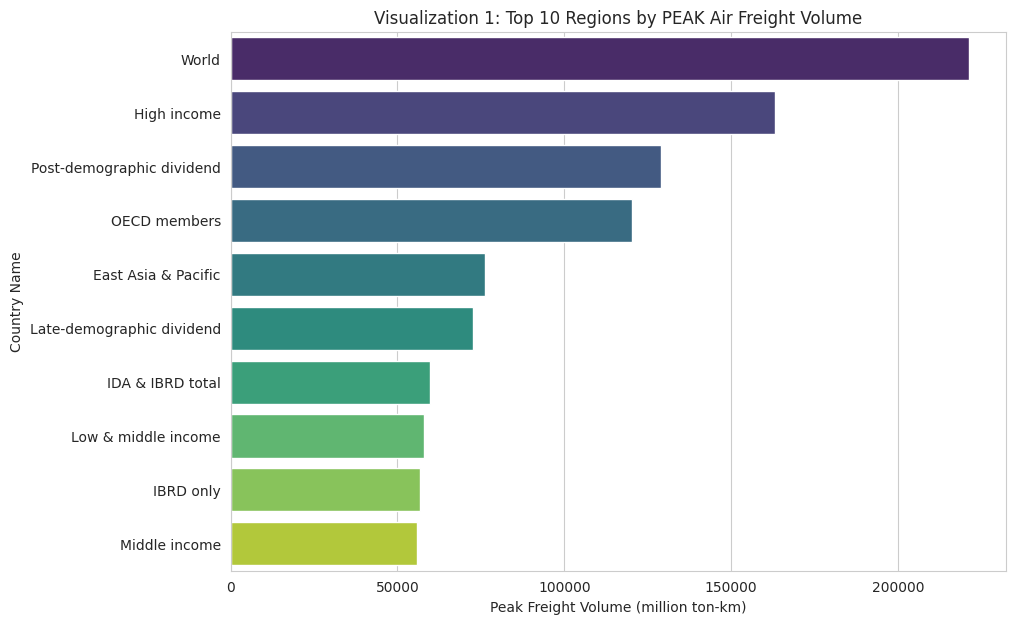

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
# Select the Top 10 airports/regions by their maximum recorded volume
top_max_load = df_volatility.nlargest(10, 'max')
sns.barplot(x='max', y='Country Name', data=top_max_load, palette='viridis')

plt.title('Visualization 1: Top 10 Regions by PEAK Air Freight Volume')
plt.xlabel('Peak Freight Volume (million ton-km)')
plt.ylabel('Country Name')
plt.show()

## Visualization 2: Top Countries by Volatility (Standard Deviation)

This visualization will show the countries with the highest standard deviation in air transport freight volume, highlighting those with the most volatile freight activity.

/tmp/ipython-input-1264670849.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='std', y='Country Name', data=top_volatility, palette='viridis')


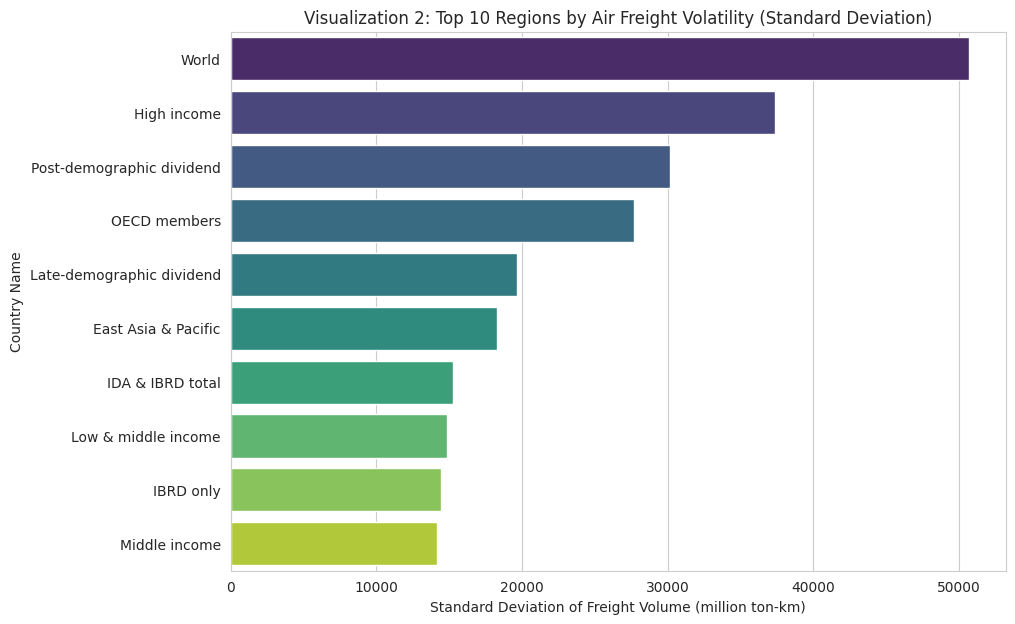

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))

# Select the Top 10 countries/regions by their standard deviation (volatility)
top_volatility = df_volatility.nlargest(10, 'std')

sns.barplot(x='std', y='Country Name', data=top_volatility, palette='viridis')

plt.title('Visualization 2: Top 10 Regions by Air Freight Volatility (Standard Deviation)')
plt.xlabel('Standard Deviation of Freight Volume (million ton-km)')
plt.ylabel('Country Name')
plt.show()

## Visualization 3: Mean vs. Standard Deviation of Air Freight Volume

This scatter plot will show the relationship between the average air freight volume and its standard deviation for each country. This helps to see if countries with higher average freight volumes also tend to have higher volatility.

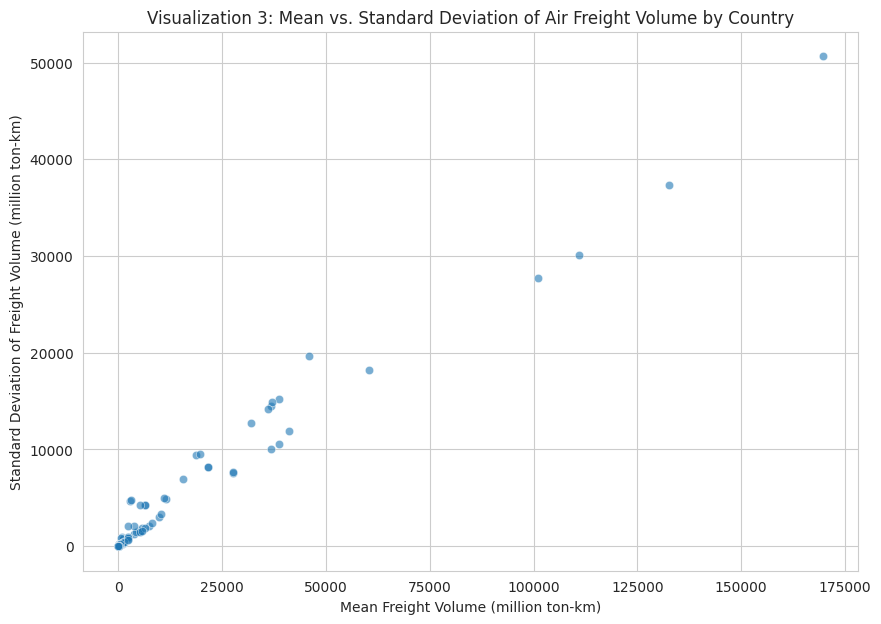

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))

sns.scatterplot(x='mean', y='std', data=df_volatility, alpha=0.6)

plt.title('Visualization 3: Mean vs. Standard Deviation of Air Freight Volume by Country')
plt.xlabel('Mean Freight Volume (million ton-km)')
plt.ylabel('Standard Deviation of Freight Volume (million ton-km)')
plt.show()